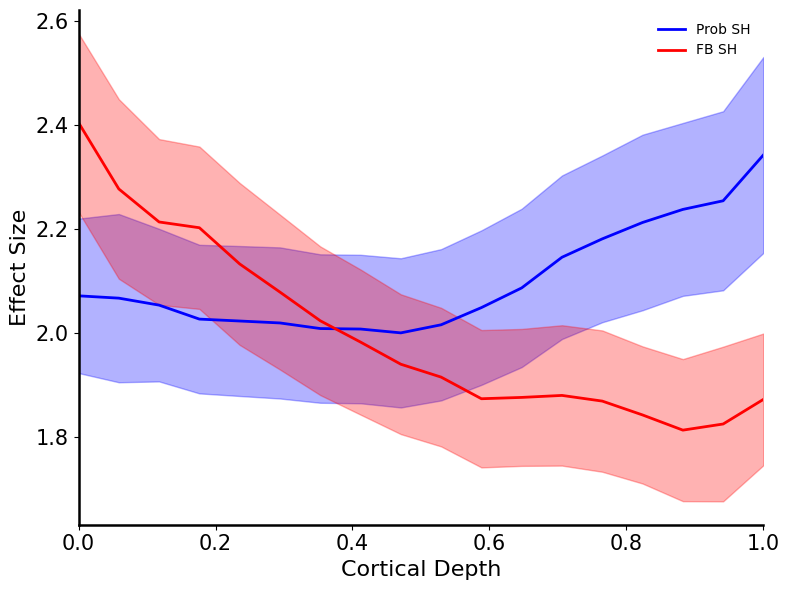

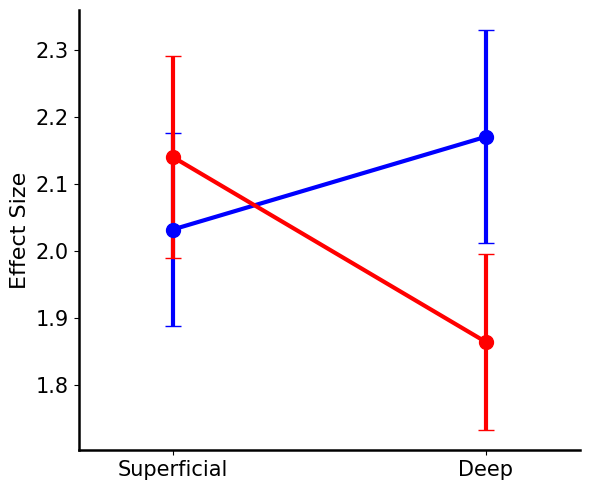


RM-ANOVA (Stage × Depth) from source file:
    ROI       Effect    F Value  Num DF  Den DF    Pr > F
0  vPFC        Stage   1.075490       1      19  0.312728
1  vPFC        Depth   3.474659       1      19  0.077843
2  vPFC  Stage:Depth  17.631230       1      19  0.000486

Stats_FDR:
    ROI               Condition                         Comparison   t_value  \
0  vPFC  Choice stage (Prob SH)  Superficial (1–9) vs Deep (10–18) -2.228571   
1  vPFC  Feedback stage (FB SH)  Superficial (1–9) vs Deep (10–18)  4.512962   

    p_value  p_value_FDR  Cohens_d_paired  df  
0  0.038115     0.038115        -0.498324  19  
1  0.000238     0.000476         1.009129  19  


In [10]:
# %% Load source data (Fig 6) and reproduce laminar profile + superficial/deep plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

roi_tag = "vPFC"  # <-- match what you saved ("vPFC" or "dlPFC")
in_xlsx = os.path.join(data_dir, "output", f"SourceData_Fig6_{roi_tag}_laminar.xlsx")

# --- Load ---
df_pp   = pd.read_excel(in_xlsx, sheet_name="PP_SH_Layers")
df_fb   = pd.read_excel(in_xlsx, sheet_name="FB_SH_Layers")
df_dep  = pd.read_excel(in_xlsx, sheet_name="Depth")
df_sd   = pd.read_excel(in_xlsx, sheet_name="SupDeep_Subject")
df_stat = pd.read_excel(in_xlsx, sheet_name="Stats_FDR")

layer_cols = [c for c in df_pp.columns if c.startswith("L")]
depth = df_dep["CorticalDepth"].to_numpy(dtype=float)

pp_all = df_pp[layer_cols].to_numpy(dtype=float)  # (subj, layer)
fb_all = df_fb[layer_cols].to_numpy(dtype=float)

subj_num, layer_num = pp_all.shape

# --- Recompute mean/SEM for laminar profiles ---
pp_mean = np.nanmean(pp_all, axis=0)
pp_sem  = np.nanstd(pp_all, axis=0, ddof=1) / np.sqrt(np.sum(np.isfinite(pp_all), axis=0))

fb_mean = np.nanmean(fb_all, axis=0)
fb_sem  = np.nanstd(fb_all, axis=0, ddof=1) / np.sqrt(np.sum(np.isfinite(fb_all), axis=0))

# ---------------------------
# Plot 1: Laminar profile
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(depth, pp_mean - pp_sem, pp_mean + pp_sem, alpha=0.3,color='blue')
ax.plot(depth, pp_mean, '-b', linewidth=2, label="Prob SH")

ax.fill_between(depth, fb_mean - fb_sem, fb_mean + fb_sem, alpha=0.3,color='red')
ax.plot(depth, fb_mean, '-r', linewidth=2, label="FB SH")

ax.set_xlabel("Cortical Depth", fontsize=16, fontweight="normal")
ax.set_ylabel("Effect Size", fontsize=16, fontweight="normal")
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_xlim([0, 1])
ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
out1 = os.path.join(data_dir, "output", f"Fig6_{roi_tag}_layerprofile_from_source.png")
plt.savefig(out1, dpi=300, bbox_inches="tight")
plt.show()
# print("Saved:", out1)

# ---------------------------
# Plot 2: Superficial vs Deep (subject-level means)
# ---------------------------
pp_sup  = df_sd["Prob_SH_Superficial"].to_numpy(dtype=float)
pp_deep = df_sd["Prob_SH_Deep"].to_numpy(dtype=float)
fb_sup  = df_sd["FB_SH_Superficial"].to_numpy(dtype=float)
fb_deep = df_sd["FB_SH_Deep"].to_numpy(dtype=float)

means = [
    [np.nanmean(pp_sup), np.nanmean(pp_deep)],
    [np.nanmean(fb_sup), np.nanmean(fb_deep)],
]
sems = [
    [np.nanstd(pp_sup, ddof=1)/np.sqrt(np.isfinite(pp_sup).sum()),
     np.nanstd(pp_deep, ddof=1)/np.sqrt(np.isfinite(pp_deep).sum())],
    [np.nanstd(fb_sup, ddof=1)/np.sqrt(np.isfinite(fb_sup).sum()),
     np.nanstd(fb_deep, ddof=1)/np.sqrt(np.isfinite(fb_deep).sum())],
]

x = np.arange(2)
x_labels = ["Superficial", "Deep"]

fig, ax = plt.subplots(figsize=(6, 5))
ax.errorbar(x, means[0], yerr=sems[0], marker="o", linewidth=3, markersize=10, capsize=6, color='blue', label="Prob SH")
ax.errorbar(x, means[1], yerr=sems[1], marker="o", linewidth=3, markersize=10, capsize=6, color='red', label="FB SH")

ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=16)
ax.set_ylabel("Effect Size", fontsize=16)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_xlim(-0.3, 1.3)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

# optional legend
# ax.legend(frameon=False, fontsize=14)

plt.tight_layout()
out2 = os.path.join(data_dir, "output", f"Fig6_{roi_tag}_supdeep_from_source.png")
plt.savefig(out2, dpi=300, bbox_inches="tight")
plt.show()
# print("Saved:", out2)

# Print ANOVA results saved in the Excel
df_anova = pd.read_excel(in_xlsx, sheet_name="ANOVA_RM")
print("\nRM-ANOVA (Stage × Depth) from source file:")
print(df_anova)

# (Optional) show stats table you saved
print("\nStats_FDR:")
print(df_stat)